In [4]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os


#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

flopy is installed in c:\users\davem\appdata\local\programs\python\python38-32\lib\site-packages\flopy


In [85]:
ensembles = [
 [3,3,3,3,3,3,3], # Flying High, like a kite
# [3,3,1,3,3,3,3], 
# [3,3,3,1,3,3,3],
# [3,3,3,3,3,3,1],
#[2,2,3,3,2,2,3], # High Sy, Hi mtn recharge, k stream = k sys
# [2,2,1,3,2,2,3], # Low Sy, Hi mtn recharge, k stream = k sys
 [2,2,3,1,2,2,3], # High Sy, low mtn recharge, K stream  = k sys
 [2,2,3,3,2,2,1], # High Sy, Hi mtn recharge, K stream << k sys
 [2,2,1,1,2,2,1], #Sort of unremarkable
[1,1,1,1,1,1,1]]  #Looowwww

#ensemble_num = ensembles[0]#change ensemble here
#print(ensemble_num)
name = "ensemble_"
well_row = 29
well_col = 37
well_loc = (0,well_row, well_col)

well2_xy= [25000, 25000] #xy location of well 
well2_row = np.floor((nrow)-(well2_xy[1]/dy)) #convert the y location to a row
well2_col=np.floor(well2_xy[0]/dx)-1 #convert the x location to a column
well2_loc = (0,well2_row, well2_col)

well3_xy= [12500, 12500] #xy location of well 
well3_row = np.floor((nrow)-(well3_xy[1]/dy)) #convert the y location to a row
well3_col=np.floor(well3_xy[0]/dx) #convert the x location to a column
well3_loc = (0,well3_row, well3_col)

well4_row = 38 
well4_col = 12 
well4_loc = (0,well4_row, well4_col)

head = np.tile({},len(ensembles))
leakage = np.tile({},len(ensembles))
fff = np.tile({},len(ensembles))
stor = np.tile({},len(ensembles))
recharge = np.tile({},len(ensembles))
et = np.tile({},len(ensembles))
frf = np.tile({},len(ensembles))

head_ts = []
mw1_head_ts = []
mw2_head_ts = []
ag_head_ts = []
#print(head)
for i in range(len(ensembles)):
    name = "ensemble_"   #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   
                   
    head[i] = {}
    leakage[i] = {}
    fff[i] = {}
    stor[i] = {}
    recharge[i] = {}
    et[i] = {}
    frf[i] = {}
    headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
    #budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')
    #Monitoring well timeseries
    head_ts.append(headobj.get_ts(well_loc))
    mw1_head_ts.append(headobj.get_ts(well2_loc))
    mw2_head_ts.append(headobj.get_ts(well3_loc))
    ag_head_ts.append(headobj.get_ts(well4_loc))
    times = headobj.get_times()
    #print(budgobj.get_unique_record_names())

    #for stress_per, time in enumerate(times): #iterate through times at end of each stress period
       # head[i]['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
        #leakage[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stress per
       # fff[i]['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
       # frf[i]['sp%s'%(stress_per)] = budgobj.get_data(text='flow right face', totim=time)
       # stor[i]['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
        #recharge[i]['sp%s'%(stress_per)] = budgobj.get_data(text='RECHARGE', totim=time) 
        #et[i]['sp%s'%(stress_per)] = budgobj.get_data(text='ET', totim=time) 

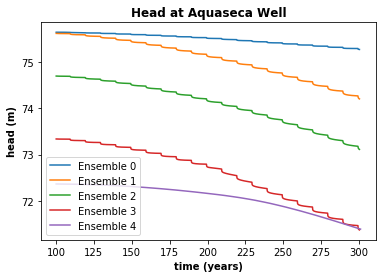

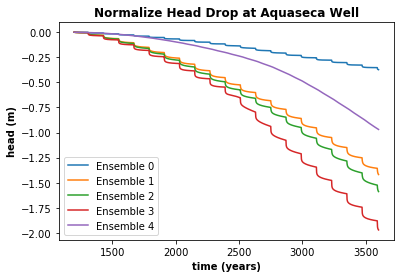

In [98]:
# Aquaseca well
nrow = 50 #number of rows
ncol = 50 #number of columns
dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 



cell_id1 = well_loc #cell at the center of the ag area
#time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at Aquaseca Well",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(head_ts[j][1200:, 0]/360, head_ts[j][1200:, 1], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()

normalized_head = np.tile({},len(ensembles))
for k in range(len(ensembles)):
    normalized_head[k] = []
    for i in range(1200, 3601):
        normalized_head[k].append(head_ts[k][i,1] - head_ts[k][1200,1])
        
plt.subplot(1, 1, 1)
plt.title("Normalized Head Drop at Aquaseca Well",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(range(1200,3601),normalized_head[j], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()
    

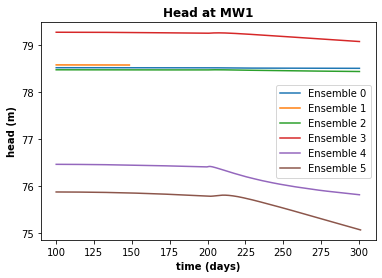

In [79]:
cell_id1 = well2_loc #cell at the center of the ag area
time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at MW1",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(mw1_head_ts[j][1200:, 0]/360, mw1_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record
plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

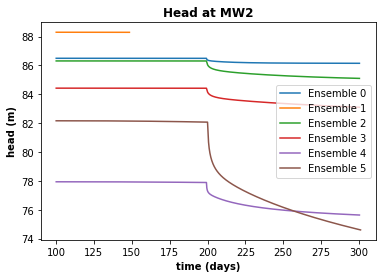

In [80]:
#Head at Monitoring well 2 
plt.subplot(1, 1, 1)
plt.title("Head at MW2",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(mw2_head_ts[j][1200:, 0]/360, mw2_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record

plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

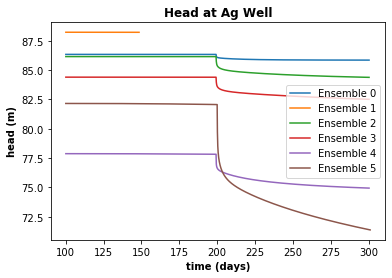

In [81]:
#Ag Well Plot
plt.subplot(1, 1, 1)
plt.title("Head at Ag Well",fontweight='bold')
plt.xlabel('time (days)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    label = 'Ensemble ' + str(j)
    plt.plot(ag_head_ts[j][1200:, 0]/360, ag_head_ts[j][1200:, 1], label=label) #plot the time series with points at each record

plt.legend()
#plt.savefig("Head_M1_5.png",dpi=600)
plt.show()

In [55]:
##STream Leakage

t2 = max(enumerate(times))
#print (times)
# print(np.sum(leakage[0]['sp1'][0].q))
# print(np.sum(leakage[0]['sp3601'][0].q))

for p in range(len(ensembles)):
    print("Final Year Streamleakage for ensemble: ", p)
    print(np.sum(leakage[p]['sp3601'][0].q))
    
    
# t = t2[0] - 12
# print(t)
# leak = 0
# #for k in range(sim_years):
# for i in range(12):
#     leak = leak + np.sum(leakage4['sp%s'%(t+i)][0].q)
        
# print("Total stream leakge at year 100:")    
# print(leak)   

annual_leak = {}
                     
yearlist = list(range(301))
# for i in range(len(yearlist)):
#     yearlist[i] = yearlist[i]*12
#print(yearlist)
for p in range(len(ensembles)):
    annual_leak[p] = {}
    for i in yearlist:
        storage_change = 0
        for sp in range(12):
            timestep = i + sp
            storage_i = np.sum(leakage[p]['sp%s'%(timestep)][0].q)
            storage_change = storage_change + storage_i
            #print(storage_change)
            if sp == 11:
                annual_leak[p][i] = storage_change
               # print('year', i/12, storage_change)
#print(annual_leak)
# t = 0
# ileak = 0
# for i in range(12):
#     ileak = ileak + np.sum(leakage['sp%s'%(t+i)][0].q)
    
# print(int(ileak))    

# ##GW outflow
# t = t2[0] - 12
# print(t)
# frf_total = 0
# for k in range(nlay):
#     for i in range(12):
#         frf_total = frf_total + np.sum(frf4['sp%s'%(t+i)][0][k][:][48])

# print("Total GW outflow 100 year:")
# print(frf_total)
# #print(np.sum(leakage['sp0'][0].q) - np.sum(leakage['sp1199'][0].q))
nlay = 3
annual_gwout = {}
for p in range(len(ensembles)):
    annual_gwout[p] = {}
    for i in yearlist:
        storage_change = 0
        for sp in range(12):
            timestep = i + sp
            for k in range(nlay):        
                storage_i = np.sum(frf[p]['sp%s'%(timestep)][0][k][:][48])
                storage_change = storage_change + storage_i
            #print(storage_change)
            if sp == 11:
                annual_gwout[p][i] = storage_change
               # print('year', i/12, storage_change)
#print(annual_gwout[0])
out = 0
for p in range(len(ensembles)):
    print("Final Year GW outflow for ensemble: ", p)
    for k in range(nlay):
         out = out + np.sum(frf[p]['sp3601'][0][k][:][48])
    print(out)

## ET
# t = t2[0] - 12
# print(t)
# ET_total = 0
# for i in range(12):
#        ET_total = ET_total + np.sum(ET4['sp%s'%(t+i)][0][1][:][:])
# print("Total ET at year 100:")
# print(ET_total) 

# yearly_ET4 = []
# for i in yearlist:
#     storage_change = 0
#     for sp in range(12):
#         timestep = i + sp
#         storage_i = np.sum(ET4['sp%s'%(timestep)][0][1][:][:])
#         storage_change = storage_change + storage_i
#         #print(storage_change)
#         if sp == 11:
#             yearly_ET4.append(storage_change*-1)
#            # print('year', i/12, storage_change)
# #print(yearly_ET)
# ## Recharge
# t = t2[0] - 12
# print(t)
# rech_total = [0]

# for i in range(12):
#     rech_total = rech_total + np.sum(np.sum(rech4['sp%s'%(t+i)][0][1][:][:]))
# print("Total rech at year 100:")
# #print(rech_total)     

# annual_rech4 = []
# for i in range(100):
#     annual_rech4.append(rech_total)
    
# pumping4 = []  
# pump = 47
# decade = 10
# for i in range(100):
#     pumping4.append(round(pump * (decade**1.5))*360)
#     if (i > 0) & (i % 10 == 0):
#         decade = decade+1
# print(pumping4)
# storage4 = []

# for i in range(100):
#     sc = (pumping4[i] + yearly_ET4[i]+ yearly_gw4[i]) - (annual_rech4[i] + yearly_leak4[i])
#     storage4.append(sc)

Final Year Streamleakage for ensemble:  0
267564.34
Final Year Streamleakage for ensemble:  1
5967.25
Final Year GW outflow for ensemble:  0
127272.603515625
Final Year GW outflow for ensemble:  1
130422.94694519043
